2

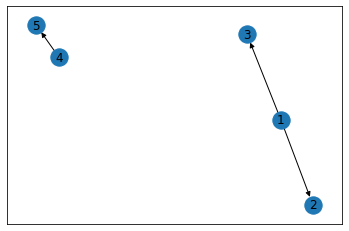

In [21]:
import networkx as nx
G = nx.DiGraph()

G.add_node(1)
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])
G.add_edges_from([(1, 2), (1, 3)])
G.add_edges_from([(4, 5)])
nx.draw_networkx(G, arrows=True)
list(G.adj[4])
G.degree[1]

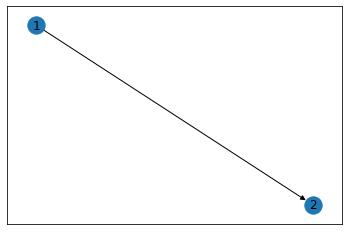

In [25]:
G = nx.DiGraph([(1, 2, {"color": "yellow"})])
G[1]
nx.draw_networkx(G, arrows=True)

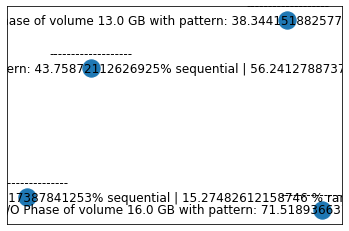

In [74]:
import networkx as nx
import numpy as np
from phase import DelayPhase, ComputePhase, IOPhase, name_app

np.random.seed(0)

compute = [0, 10]
read = [1e9, 0]
write = [0, 5e9]
delay = 5
delay_phase = DelayPhase(delay)

def compute_phase():
    return ComputePhase(np.random.randint(1, 25), 
                        cores=np.rand.randint(1, 3))

def read_io():
    return IOPhase(cores=np.random.randint(1, 3), 
                operation="read", 
                volume=np.random.randint(1, 20)*1e9,
                pattern=np.random.rand())

def write_io():
    return IOPhase(cores=np.random.randint(1, 3), 
                   operation="write", 
                   volume=np.random.randint(1, 20)*1e9,
                   pattern=np.random.rand())

graph = nx.DiGraph()

read_io_list = [read_io() for i in range(2)]
write_io_list = [write_io() for i in range(2)]
graph.add_nodes_from(read_io_list + write_io_list)

for i in range(len(read_io_list)):
    for j in range(i, len(write_io_list)):
        if np.random.rand() < 0.5:            
            graph.add_edge(read_io_list[i], write_io_list[j], 
                        object=compute_phase(), 
                        weight=compute_phase().duration)
#app_graph.add_edge(read_io, write_io, object=compute_phase, weight=compute_phase.duration)



nx.draw_networkx(app_graph, arrows=True)

True
True
['o', 'n', 'm', 's', 'p', 'q']


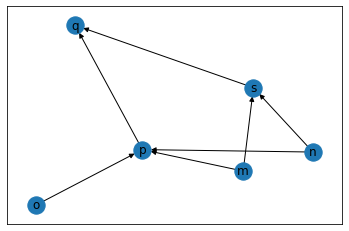

In [81]:
graph = nx.DiGraph()
graph.add_edges_from([('m', 'p'), ('n', 'p'), 
                      ('o', 'p'), ('p', 'q'),
                      ('m', 's'), ('n', 's'), ('s', 'q')])
nx.draw_networkx(graph, arrows=True)
print(nx.is_directed(graph)) # => True
print(nx.is_directed_acyclic_graph(graph)) # => True
print(list(nx.topological_sort(graph))) # => ['o', 'n', 'm', 'p', 'q']

['root', 'a', 'b', 'd', 'e', 'c']
['root', 'a', 'b', 'c', 'd', 'e']
('root', 'a')
('a', 'b')
('b', 'c')
('b', 'd')
('d', 'e')


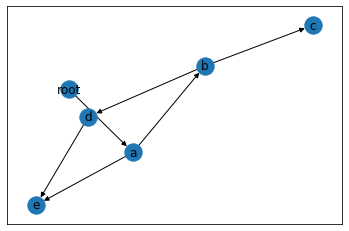

In [85]:
from matplotlib import pyplot as plt
from networkx import dfs_edges
graph = nx.DiGraph()
graph.add_edges_from([("root", "a"), ("a", "b"), ("a", "e"), ("b", "c"), ("b", "d"), ("d", "e")])

nx.draw_networkx(graph, arrows=True)
print(list(nx.topological_sort(graph)))
successors = nx.nodes(nx.dfs_tree(graph, "root"))
print(successors)
for edge in dfs_edges(graph, "root"):
    print(edge)